In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [101]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [103]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [104]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)" :"Spending_Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


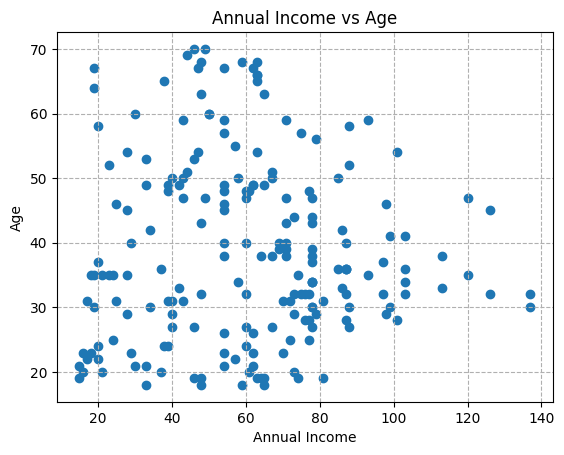

In [105]:
plt.scatter(df['Annual Income'], df['Age'])
plt.title('Annual Income vs Age')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

The plot shows no clear relationship between age and income. Customers across all ages have varied income levels, meaning age doesn’t strongly influence earning capacity. Younger and older customers are spread across both low and high income ranges.

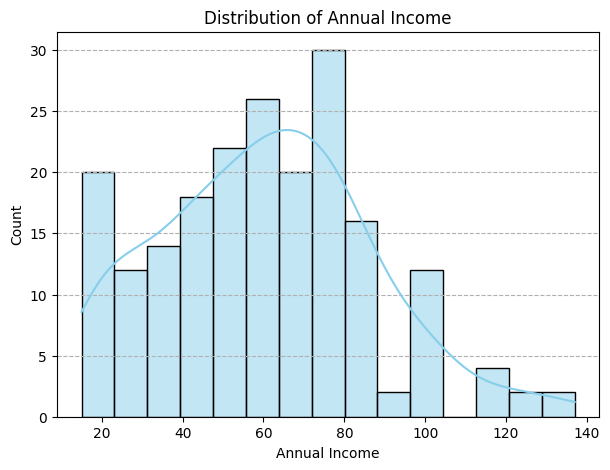

In [106]:
plt.figure(figsize=(7,5))
sns.histplot(df['Annual Income'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()

Most customers earn between 40k-70k annually, showing the mall's main audience is middle-income earners.

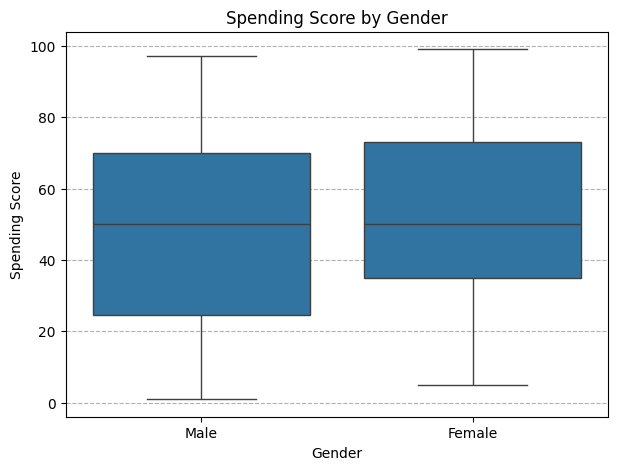

In [107]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.grid(axis='y', linestyle='--')
plt.show()

The boxplot shows that female customers generally have higher spending scores than males. Their median and upper quartile values are slightly higher, suggesting that female customers tend to spend more and are more active shoppers. This indicates that marketing campaigns targeting females could yield better engagement and sales.

In [108]:
# Change Gender column into numeric values
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 2})

# Display to verify the result
print(df.head())

   CustomerID  Gender  Age  Annual Income  Spending_Score
0           1       2   19             15              39
1           2       2   21             15              81
2           3       1   20             16               6
3           4       1   23             16              77
4           5       1   31             17              40


In [109]:
# create new dataframe that consist only annual income and spending score
df = df[['Age', 'Annual Income', 'Spending_Score']]
df.head()

,Age,Annual Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Data Scaling (Choose One)

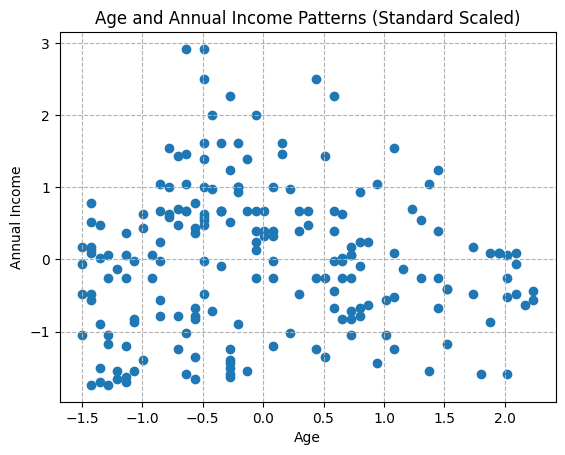

In [110]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit and transform your current 3-column dataset
df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Age", "Annual Income", "Spending_Score"])

df_sc_scaled.head()

# Visualization
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Annual Income"])
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Annual Income Patterns (Standard Scaled)")
plt.show()

There doesn't appear to be a strong linear correlation between scaled Age and scaled Annual Income. Customers of various scaled ages have a wide range of scaled incomes.
The data points seem to be somewhat spread out, indicating that these two features alone may not be sufficient to form distinct clusters based on visual inspection.

# K-Means Clustering

In [111]:
from sklearn.cluster import KMeans

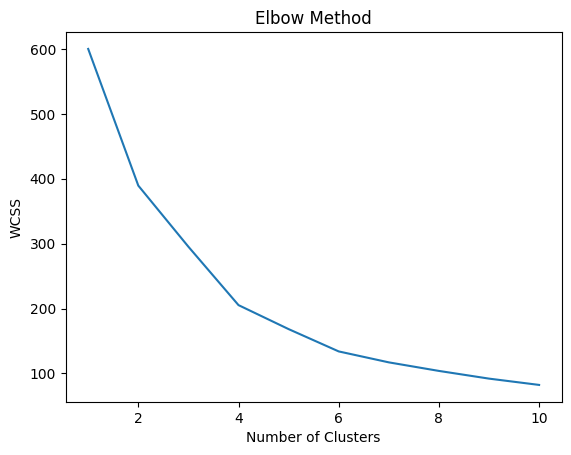

In [112]:
wcss = []
for i in range(1, 11):   # clusters 1–10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [113]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  600.000000
1                   2  389.386189
2                   3  295.212246
3                   4  205.225147
4                   5  168.247580
5                   6  133.868334
6                   7  117.011555
7                   8  103.828578
8                   9   91.956839
9                  10   82.245745


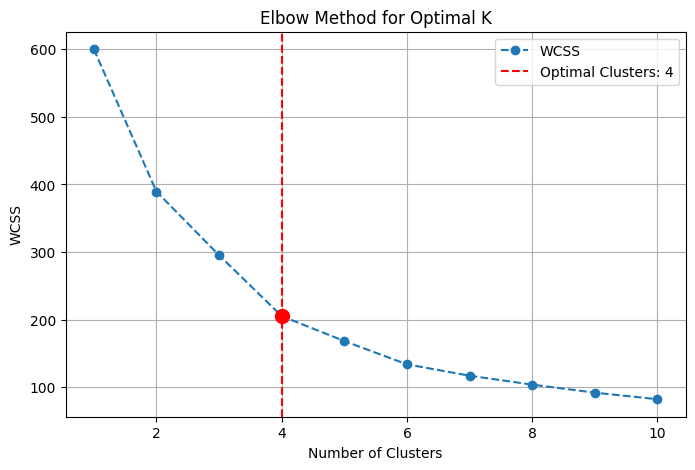

The optimal number of clusters is: 4


In [114]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


The graph clearly shows the elbow point at K = 4, where the drop in WCSS starts to slow down. This means 4 clusters is the most suitable choice, as it provides a good balance between minimizing intra-cluster distance and avoiding over-segmentation. In this case, the data naturally groups into four distinct customer segments.

In [115]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Age,Annual Income,Spending_Score,KMeans_Cluster
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3


/tmp/ipython-input-1239235313.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


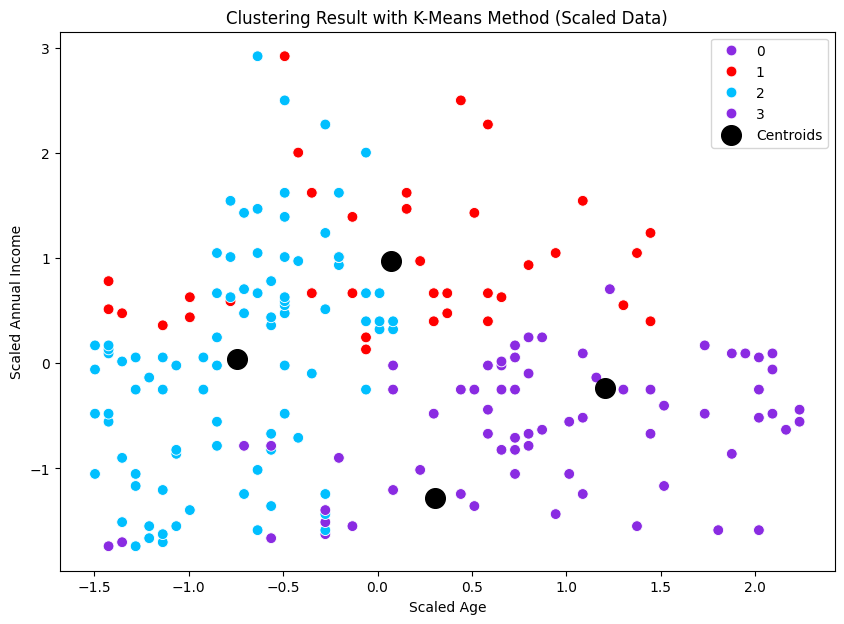

In [116]:
# Visualize the result using scatter chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(
    x="Age",
    y="Annual Income",
    hue=kmeans.labels_,
    palette=["blueviolet", "red", "deepskyblue"],
    data=df_sc_scaled,
    s=60
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="black",
    label="Centroids"
)
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()


The scatter plot shows that the K-Means model successfully formed three distinct customer clusters based on scaled age and annual income. Each color represents a different group with unique characteristics. One cluster includes younger customers with lower income, another includes mid-aged customers with moderate income, and the last group represents older or higher-income customers. The black points are centroids, showing the average position of each cluster.

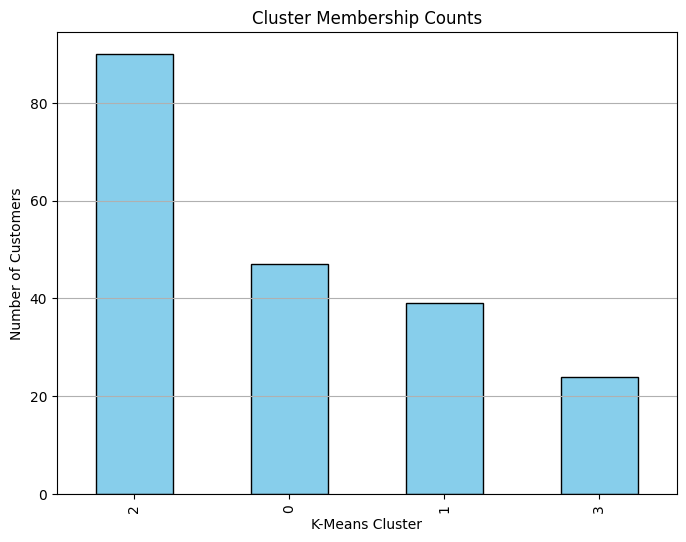

In [117]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [118]:
# Group the data by cluster and calculate the mean, min, and max for each feature
cluster_summary = df.groupby(kmeans.labels_).agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income': ['mean', 'min', 'max'],
    'Spending_Score': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age         Annual Income          Spending_Score      \
                     mean min max          mean min  max           mean min   
KMeans_cluster                                                                
0               55.638298  40  70     54.382979  38   79      48.851064  35   
1               39.871795  19  59     86.102564  64  137      19.358974   1   
2               28.500000  18  40     61.677778  15  137      71.766667  41   
3               43.125000  19  67     26.958333  15   40      22.083333   3   

                    
               max  
KMeans_cluster      
0               60  
1               42  
2               99  
3               42

Managerial Implications Based on the Four Clusters

Cluster 0 - Young / Low-Income Spenders

Profile:

* Age around 20-30 years old.

* Lower income level and moderate spending score.

* Likely students or early-career individuals with limited budgets.

Implications:

* Focus on affordable products or entry-level offerings.

* Promote discounts, seasonal deals, or bundle promotions.

* Engage through social media and influencer marketing for stronger reach.

* Build loyalty through rewards programs that encourage repeat visits.

Cluster 1 - Young / High-Spending Group

Profile:

* Age mostly below 35 years old.

* Moderate to high income but very high spending score.

* Enjoy shopping and lifestyle experiences, impulsive spenders.

Implications:

* Highlight premium lifestyle products with aspirational appeal.

* Use digital ads and personalized offers to retain engagement.

* Focus on fashion, entertainment, or leisure promotions.

* Encourage exclusivity through membership or event-based marketing.

Cluster 2 - Middle-Aged / Moderate Income Consumers

Profile:

* Age between 35-50 years old.

* Moderate income and average spending score.

* Practical buyers who value function and necessity over impulse.

Implications:

* Emphasize reliability, quality, and long-term value.

* Offer bundle deals and family-oriented promotions.

* Marketing should stress comfort, utility, and trust.

* Suitable for steady, retention-based programs.

Cluster 3 - Mature / High-Income Professionals

Profile:

* Age around 40-60 years old.

* Highest income group with moderate to high spending scores.

* Established professionals who prefer quality and exclusivity.

Implications:

* Target with premium or luxury products and VIP services.

* Personalize offers through loyalty programs or private events.

* Focus on brand prestige, convenience, and customer experience.

* Excellent for cross-selling and high-value product campaigns.